# Problem: Logistic regression

In this exercice we consider students that apply to a Master program in an University. Their chance of being accepted depend on several criteria among which the marks they obtained to two exams (called Exam1 and Exam2).

We want to build a simple probabilistic model based only on the results obtained for these two exams. For this we use Logistic Regression to calculate the probability for a student to be accepted to the Master program given the marks he obtained for each exam:

$$\text{p(accepted)} = \sigma(w_0 + w_1 \cdot \text{Exam1} + w_2 \cdot \text{Exam2}),$$

where $\sigma()$ is the sigmoid function.

By analysing the success rate of the applicants of the previous years it was possible to determine the weights of this model, and these were estimated to be:

$$ w_0 = -44.997, w_1 = 0.36357, w_2 = 0.35662$$

In this exercice we would like to estimate the probability of 100 new students to be accepted to the Master program given the marks that they obtained to their exams.


### Initialize

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 0) Question on lecture

Explain how the model is trained:

a) What is the loss function used here and why ?

b) What method is used to minimize the loss function ?

c) How are determined the weights $w_0$, $w_1$ and $w_2$ ?


## 1) The data
The text file below contains the marks obtained by 100 students at the two exams. 

a) Print the first 10 entries of the file.

b) Represent this dataset on a figure with two axes: Exam1 and Exam2.

In [3]:
# Load and read file
from numpy import genfromtxt
student_marks = genfromtxt('marks_nolabels.txt', delimiter=',')


In [4]:
print(student_marks[:10,:])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]]


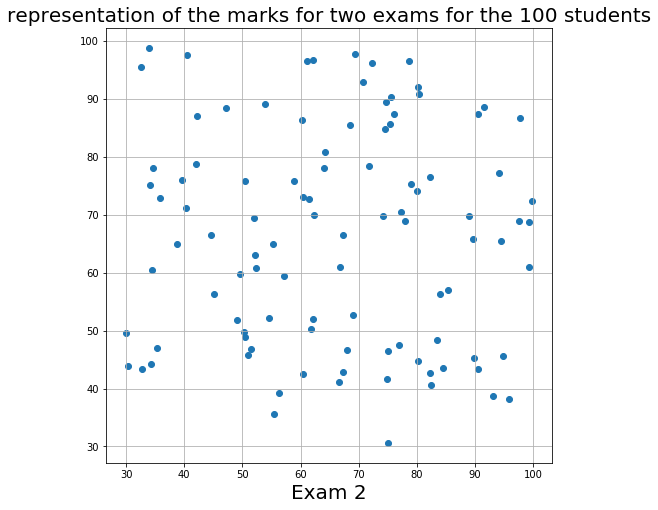

In [6]:
x = student_marks[:,0]
y = student_marks[:,1]
fig,axes =plt.subplots(figsize=(8,8))
axes.set_xlabel('Exam 1',fontsize=20)
axes.set_xlabel('Exam 2',fontsize=20)
axes.grid()
plt.title('representation of the marks for two exams for the 100 students',fontsize=20)
plt.scatter(x,y)

plt.show()

## 2) The model

a) Write two functions, `sigmoid(x)` and `dsig(x)` that returns, respectively $\sigma(x)$ and $\frac{\text{d} \sigma}{\text{d} x}(x)$.

b) Write a function `predict` that returns the probability for each student to be accepted by the University.

In [11]:
### sigmoid(x):
def sigmoid(x):
    return 1/(1+np.exp(-x))

### dsig(x):
def dsig(x):
    return sigmoid(x)*(1-sigmoid(x))

In [12]:
features = student_marks[:,0:2]
const = np.ones(shape=(len(features),1))
features = np.append(const, features, axis=1)

In [13]:
weights = np.array([-44.997, 0.36357, 0.35662])

predict (x): p (accepted) = sigma(w0+(w1*Exam1)+(w2*exam2)
avec w0= -44.997; w1 = 0.36357; w2= 0.35662
t= (w0,w1,w2)

In [14]:
def predict(x,t):
    z = np.dot(x, t.transpose())
    return sigmoid(z)

## 3) Probabilities

a) With the values of the weights $w_0,w_1,w_2$ given above calculate the probability for each student to be accepted. Represent the distribution of all probabilities in a histogram.

b) For a threshold of p(accepted) = 0.5 how many how many students are predicted to pass or fail the acceptation at the University ?

In [17]:
prob = predict( features, weights)
len(prob)

100

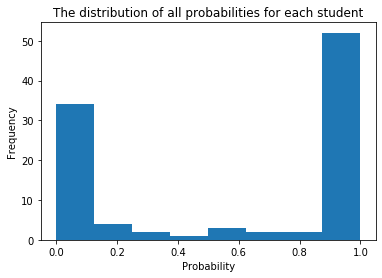

In [18]:
_= plt.hist(prob, bins='auto')
plt.title('The distribution of all probabilities for each student')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

For a threshold of p(accepted)=0.5 how many students are predicted to pass or fail the acceptation at the University

In [20]:
accepted = 0
failed = 0
for i in range(len(prob)):
    if prob[i] >= 0.5:
        accepted = accepted + 1
    else:
        failed = failed + 1
print('The are ' + str(accepted ), 'students are predicted to pass the acceptation at the University')
print('The are '+ str(failed), 'students are predicted to fail the acceptation at the University')

    

The are 59 students are predicted to pass the acceptation at the University
The are 41 students are predicted to fail the acceptation at the University


## 4) Results

a) Represent the data in a figure with two axes (Exam1 and Exam2). Show with a red marker students that are predicted to fail the admission and with a blue marker students who are predicted to pass.

b) Modify this figure showing this time the markers with a color depending on the probability value: from dark red for low probabilities to dark blue for high probabilities.

c) Add a line showing the decision boundary separing both classes.  Hint: this line correspond to points for which p(accepted)=0.5, that is, students for which the weighted sum is such that $(w_0 + w_1 \cdot \text{Exam1} + w_2 \cdot \text{Exam2})=0$.

In [21]:
prob.shape = (np.size(prob),1)
len(prob)

100

In [23]:
data = np.append(features, prob, axis=1)

In [24]:
labels = []
for i in range(len(prob)):
    if prob[i] >= 0.5:
        labels.append(1)
    else:
        labels.append(0)
        
labels = np.asarray(labels)
labels.shape = (np.size(labels),1)

In [25]:
data_complete = np.append(data, labels, axis=1)
#data_complete[:10,:]

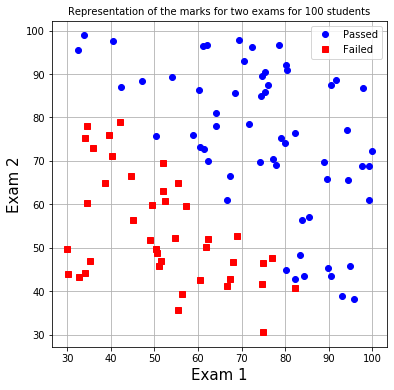

In [28]:
labels=data_complete[:,4]

student_passed = data_complete[labels == 1]
student_failed = data_complete[labels == 0]
# OR
#student_passed = data_complete[data_complete[:,3] <.5]
#student_failed = data_complete[data_complete[:,3] >=.5]


# Show data
fig, axes = plt.subplots(figsize=(6,6))
#plt.plot([0, 1, 2])
axes.plot(student_passed[:,1],student_passed[:,2],'bo',lw=1,label='Passed')
axes.plot(student_failed[:,1],student_failed[:,2],'rs',lw=1,label='Failed')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)
axes.grid()

plt.title('Representation of the marks for two exams for 100 students',fontsize=10)
plt.legend(loc='upper right',fontsize=10)

b) we suppose that the lowprobabilities are between[0;.66] and the high probability are greater than.66 so we can write

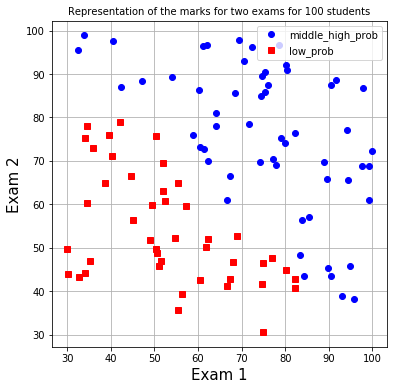

In [30]:
low_prob = data_complete[data_complete[:,3] <=.66]
middle_high_prob = data_complete[data_complete[:,3]>.66]

#show data
fig, axes = plt.subplots(figsize=(6,6))
axes.plot(middle_high_prob[:,1],middle_high_prob[:,2],'bo',lw=1,label='middle_high_prob')
axes.plot(low_prob[:,1],low_prob[:,2],'rs',lw=1,label='low_prob')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)

axes.grid()

plt.title('Representation of the marks for two exams for 100 students',fontsize=10)
plt.legend(loc='upper right',fontsize=10)

c)

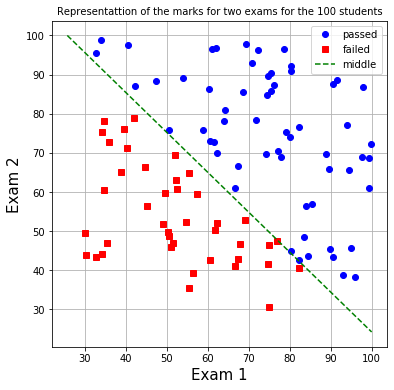

In [33]:
labels=data_complete[:,4]

student_passed = data_complete[labels == 1]
students_failed = data_complete[labels == 0]

#show data
fig, axes = plt.subplots(figsize=(6,6))
#plt.plot([0, 1, 2])
axes.plot(student_passed[:,1],student_passed[:,2],'bo',lw=1,label='passed')
axes.plot(student_failed[:,1],student_failed[:,2],'rs',lw=1,label='failed')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)
plt.plot([25.675, 100],[100, 24.227],linestyle='--',color='g',label='middle')
axes.grid()

plt.title('Representattion of the marks for two exams for the 100 students',fontsize=10)
plt.legend(loc='upper right',fontsize=10)

OR

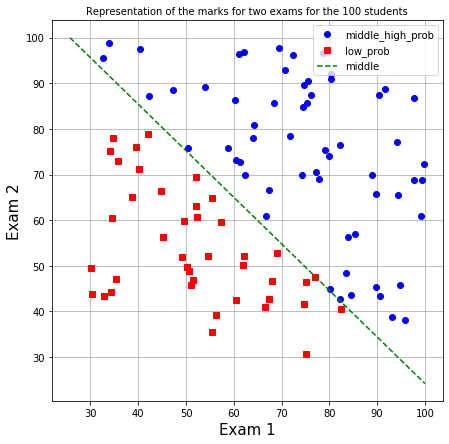

In [34]:
low_prob = data_complete[data_complete[:,3] <.5]
middle_high_prob = data_complete[data_complete[:,3]>=.5]

#show data
fig, axes =plt.subplots(figsize=(7,7))
axes.plot(middle_high_prob[:,1],middle_high_prob[:,2],'bo',lw=1,label='middle_high_prob')
axes.plot(low_prob[:,1],low_prob[:,2],'rs',lw=1,label='low_prob')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)
plt.plot([25.675, 100],[100,24.227],linestyle='--',color='g',label='middle')
axes.grid()
plt.title('Representation of the marks for two exams for the 100 students',fontsize=10)
plt.legend(loc='upper right',fontsize=10)


# Exercices

All questions below are independent of each other. 

## 1) Neural network with Pytorch

Look below at the pytorch implementation of a fully connected neural network (do not try to run the cell). 

a) How is called this specific NN architecture ? In which cases can it be used ?

b) How many weights, including bias terms, need to be determined for each layer and in total for this network ?

c) Modify the code by introducing two layers of dimension `hidden_layer2=25` with a sigmoid activitation function.
Be careful to respect this specific NN architecture.

a) it is the simple NN Architecture.it can be used while we have one hidden layer and one output

In [36]:
#for each layer
500

#total network
10

10

## 2) Implementation of a simple NN with Numpy

In the chap.3 of the lectures, pages 54-56, an illustration of a NN calculation is given. 

a) Implement this example, using **only** the `numpy` library, and check you obtain the same results as in page 56 after 1 iteration. For this define all necessary functions, apply forward pass and backward pass, etc.

b) Give the result (weights, output value) after another iteration. 

In [39]:
#a)

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N =64      #N:input batch size
D_in = 4 # D_in: input dimension
H = 2     # H: hidden layer dimension;
D_out = 1  # D_out: output dimension

#Create random input and output (target) training data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

#Randomly initialize weights (no bias terms)
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
learnig_rate = 1e-6

In [40]:
### First let's look at the dimension  of data and weights

print("x:",x.shape)
print("w1:",w1.shape)
print("w2:",w2.shape)
print("y:",y.shape)

x: (64, 4)
w1: (4, 2)
w2: (2, 1)
y: (64, 1)


In [41]:
### Forward pass: compute predicted.y
 
h = x.dot(w1)
h_relu = np.maximum(h, 0)
y_pred =h_relu.dot(w2)

In [43]:
### Calculate and print cost function

cost =np.square(y_pred - y).sum()
print('total cost:', cost)

total cost: 162.9451850966609


In [50]:
### Backprop to compute gradients of w1 and w2 with respect to the lost

grad_y_pred = 2.0 * (y_pred - y)
grad_w2 = h_relu.T.dot(grad_y_pred)
grad_h_relu = grad_y_pred.dot(w2.T)
grad_h = grad_h_relu.copy()
grad_h[h < 0] = 0                 # if h<0 then set grad_h=0 
grad_w1 = x.T.dot(grad_h)

In [51]:
### Update weights w1 and w2

#update weights
w1 -= learning_rate * grad_w1
w2 -= learning_rate * grad_w2

NameError: name 'learning_rate' is not defined

### 3) Regression

Describe the figure below. What is the difference between these models ? Which one seems to generalize better ?

By the way is this figure an example of linear regression ? Why ?

<center><img src="fit.png" width="600" /></center>


the differences between this model are: test data model represent the model after training the models.
    No regularization and ridge regul model evaluates the overfit of the model.
    A figure is an example of linear regression because the data for x between 0.2 and 0.8 should be represented by a line.